In [52]:
# load the dataset.
import pandas as pd
df = pd.read_csv('/home/caihao/VSCodeProjects/AI-drug/data/all_companies.csv')
df.head()

,company_name,category,website,uses_ai_to,allows_researchers_to,founded,headquarters,city,state,country,latitude,longitude,count,funding_stage,funding_amount
0,3BIGS,Aggregate and synthesize information,http://3bigs.com,"Discover relationships between diseases, targe...",Repurpose drugs for new indications,2017,"Suwon, Ch'ungch'ong-namdo, South Korea",Suwon,Ch'ungch'ong-namdo,South Korea,37.263332,127.028747,1,NaN,NaN
1,Amplion,Aggregate and synthesize information,https://www.amplion.com,Synthesize biomedical knowledge and biomarker ...,"Ensure an effective mix of biomarkers, establi...",2013,"Bend, Oregon, United States",Bend,Oregon,United States,44.058173,-121.315310,1,A,2.6
2,BioSymetrics,Aggregate and synthesize information,http://www.biosymetrics.com,"Process raw phenotypic, imaging, drug, and gen...",Integrate rapid analytics and machine learning...,2015,"New York, New York, United States",New York,New York,United States,40.712728,-74.006015,14,NaN,NaN
3,OneThree Biotech,Aggregate and synthesize information,https://onethree.bio/,Integrate and analyze data from over 30 types ...,Generate new insights across the drug developm...,2018,"New York, New York, United States",New York,New York,United States,40.712728,-74.006015,14,Seed,2.5
4,Owkin,Aggregate and synthesize information,http://www.owkin.com,"Build intelligence from distributed datasets, ...",Overcome the problem of data-sharing in health...,2016,"New York, New York, United States",New York,New York,United States,40.712728,-74.006015,14,A,56.1


In [53]:
dataset = df[['company_name', 'category', 'uses_ai_to', 'allows_researchers_to']].copy()
dataset['text'] = dataset['uses_ai_to'] + ' ' + dataset['allows_researchers_to']
dataset.head()

,company_name,category,uses_ai_to,allows_researchers_to,text
0,3BIGS,Aggregate and synthesize information,"Discover relationships between diseases, targe...",Repurpose drugs for new indications,"Discover relationships between diseases, targe..."
1,Amplion,Aggregate and synthesize information,Synthesize biomedical knowledge and biomarker ...,"Ensure an effective mix of biomarkers, establi...",Synthesize biomedical knowledge and biomarker ...
2,BioSymetrics,Aggregate and synthesize information,"Process raw phenotypic, imaging, drug, and gen...",Integrate rapid analytics and machine learning...,"Process raw phenotypic, imaging, drug, and gen..."
3,OneThree Biotech,Aggregate and synthesize information,Integrate and analyze data from over 30 types ...,Generate new insights across the drug developm...,Integrate and analyze data from over 30 types ...
4,Owkin,Aggregate and synthesize information,"Build intelligence from distributed datasets, ...",Overcome the problem of data-sharing in health...,"Build intelligence from distributed datasets, ..."


## Fetch word count

In [54]:
#Fetch wordcount for each abstract
dataset['word_count_ai'] = dataset['uses_ai_to'].apply(lambda x: len(str(x).split(" ")))
dataset['word_count_research'] = dataset['allows_researchers_to'].apply(lambda x: len(str(x).split(" ")))
dataset['word_count'] = dataset['text'].apply(lambda x: len(str(x).split(" ")))
dataset.describe()

,word_count_ai,word_count_research,word_count
count,230.000000,230.000000,230.000000
mean,11.330435,12.547826,23.878261
std,5.164071,5.285299,7.619382
min,2.000000,4.000000,7.000000
25%,8.000000,9.000000,18.250000
50%,10.000000,11.500000,23.000000
75%,15.000000,15.000000,29.000000
max,28.000000,28.000000,48.000000


## Most common and uncommon words

In [55]:
#Identify common words
freq = pd.Series(' '.join(dataset['text']).split()).value_counts()[:50]
freq

and            342
of             172
for            112
to             110
data            99
the             91
in              86
from            75
drug            74
a               69
clinical        64
with            61
Analyze         55
novel           47
drugs           47
new             47
that            38
on              32
Predict         32
trials          29
diseases        29
patients        28
cancer          27
disease         26
by              25
candidates      24
discovery       23
targets         23
insights        22
development     21
molecules       21
Find            21
as              21
compounds       21
Develop         21
molecular       20
trial           19
Generate        19
Identify        16
patient         16
biological      16
biomedical      16
therapeutic     16
identify        16
at              15
protein         15
design          15
Discover        15
into            15
including       15
dtype: int64

In [56]:
#Identify uncommon words
infreq =  pd.Series(' '.join(dataset['text']).split()).value_counts()[-50:]
infreq

more?                    1
safer,                   1
imaging,                 1
transfer                 1
influencing              1
post-marketing           1
resistance               1
open-                    1
especially               1
immunotherapy            1
entities                 1
experience               1
connected                1
structure-to-function    1
gather                   1
I,                       1
pathophysiology          1
statistically            1
customized               1
ideal                    1
statistical              1
stratify                 1
complexes                1
commands                 1
fit                      1
interpret                1
designing                1
environmental            1
evolutionarily           1
Visually                 1
map                      1
pathology-based          1
Infer                    1
uncertainty              1
stable,                  1
down                     1
omic,                    1
l

## Text Preprocessing

In [57]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


In [58]:
# Libraries for text preprocessing
import re
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
# nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

In [59]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ['and', 'of', 'data', 'from', 'analyze', 'to', 'in', 'the', 'a', 'for', 'with', 'that', 'on', 'insights', 'novel', 'by', 'as', 'new', 'find', 'datasets', 'biological', 'sources', 'generate', 'discovery', 'complex', 'find', 'other','and', 'of', 'for', 'to', 'the', 'in', 'new', 'with', 'novel', 'a', 'develop', 'that', 'development', 'data', 'from', 'on', 'by', 'find', 'more', 'as', 'at', 'improve', 'based']
stop_words = stop_words.union(new_words)

In [60]:
def preprocessing(dataset):
    corpus = []
    for i in range(0, len(dataset)):
        #Remove punctuations
        text = re.sub('[^a-zA-Z]', ' ', dataset['text'][i])
        
        #Convert to lowercase
        text = text.lower()
        
        #remove tags
        text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
        
        # remove special characters and digits
        text=re.sub("(\\d|\\W)+"," ",text)
        
        ##Convert to list from string
        text = text.split()
        
        ##Stemming
        ps=PorterStemmer()
        #Lemmatisation
        lem = WordNetLemmatizer()
        text = [lem.lemmatize(word) for word in text if not word in  
                stop_words] 
        text = " ".join(text)
        corpus.append(text)
    return corpus

corpus = preprocessing(dataset=dataset)

In [61]:
corpus[:20]

['discover relationship disease target drug repurpose drug indication',
 'synthesize biomedical knowledge biomarker expertise guide biomarker strategic planning ensure effective mix biomarkers establish differentiation recruit right patient identify best companion diagnostic opportunity',
 'process raw phenotypic imaging drug genomic set integrate rapid analytics machine learning capability existing business process care enhance discovery gain insight business enable fast driven decision',
 'integrate type chemical clinical across drug pipeline including target mechanism action',
 'build intelligence distributed including privacy safe transfer federated learning overcome problem sharing healthcare automate diagnostics predict treatment outcome optimize clinical trial',
 'identify unique neural signature alzheimer disease electroencephalography monitor response alzheimer disease treatment including clinical trial',
 'pathology slide model incorporate diagnosis world foremost cancer expe

## Word Cloud

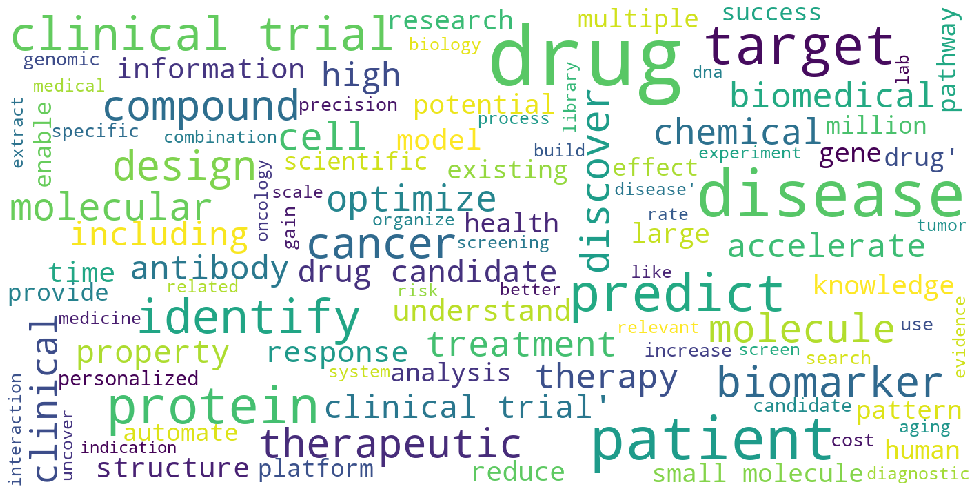

In [87]:
# Word cloud for entire corpus.
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
wordcloud = WordCloud(
                          width=1400, 
                          height=700,
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(corpus))
fig, (ax1) = plt.subplots(1, 1, figsize=(14, 7))
ax1.imshow(wordcloud)
ax1.axis('off')
# ax1.set_title('All categories')
plt.tight_layout()
plt.show()
# fig.savefig('All.png')

In [43]:
# Word cloud for different categories.
phases = ['Aggregate and synthesize information', 'Understand mechanisms of disease', 'Establish biomarkers', 'Generate data and models', 'Repurpose existing drugs', 'Generate novel drug candidates', 'Validate and optimize drug candidates', 'Design drugs', 'Design preclinical experiments', 'Run preclinical experiments', 'Design clinical trials', 'Recruit for clinical trials', 'Optimize clinical trials', 'Publish data', 'Analyze real world evidence']
corpuses = []
for phase in phases:
    dataset_p = dataset.loc[dataset.category==phase].copy().reset_index(drop=True)
    corpus_p = preprocessing(dataset_p)
    corpuses.append(corpus_p)

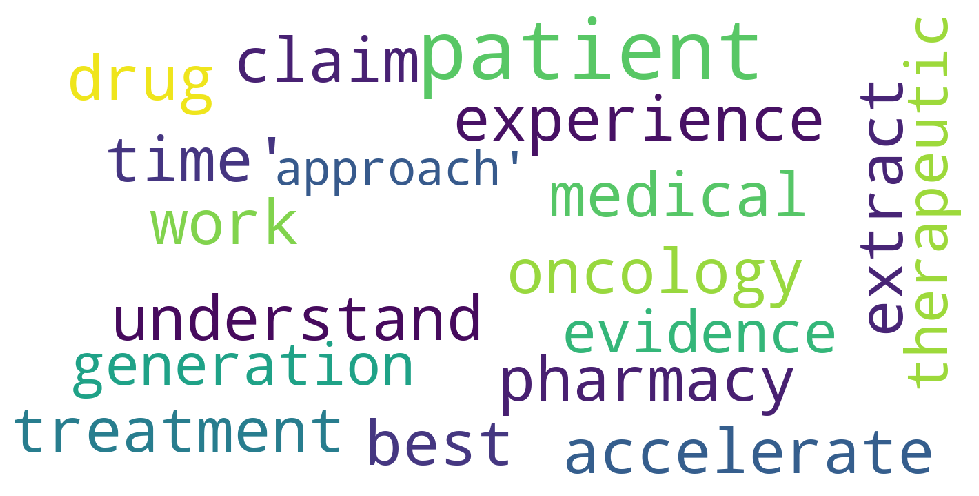

In [94]:
fig, (ax1) = plt.subplots(1, 1, figsize=(14, 7))
for i, corpus in enumerate(corpuses):
    phase = phases[i]
    ax = ax1
    wordcloud = WordCloud(
                          width=1400, 
                          height=700,
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(corpus))
    ax.imshow(wordcloud)
    ax.axis('off')
    # break
    # ax.set_title(phase)
    plt.tight_layout()
    fig.savefig('../assets/{}.png'.format(phase))

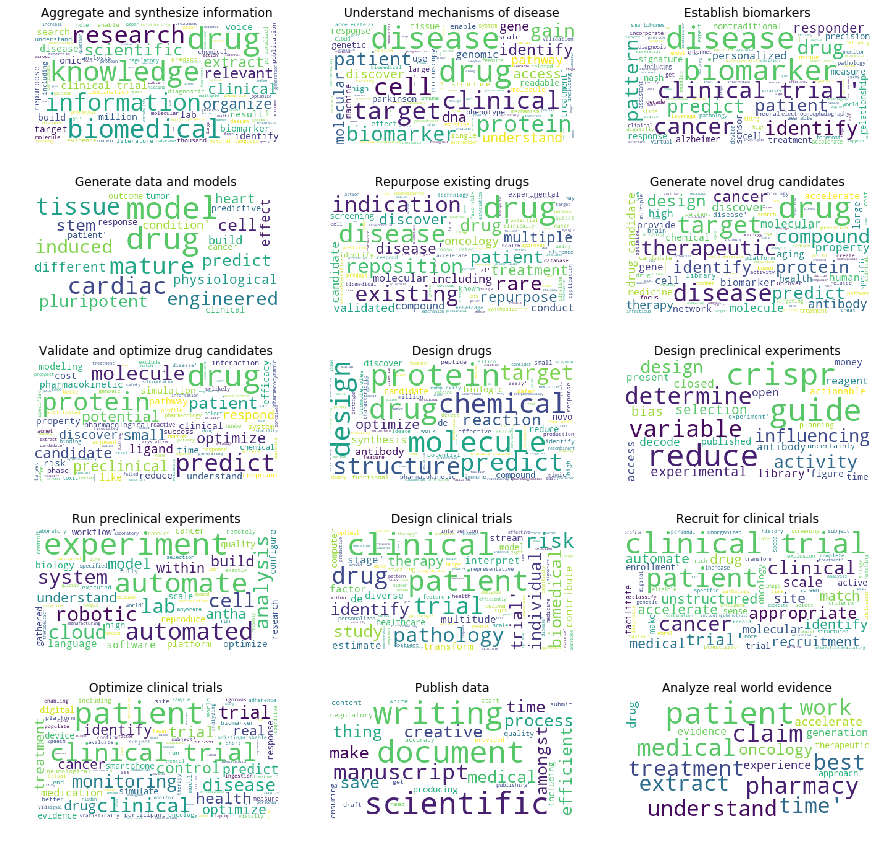

In [70]:
fig, [[ax1, ax2, ax3],
      [ax4, ax5, ax6],
      [ax7, ax8, ax9],
      [ax10, ax11, ax12],
      [ax13, ax14, ax15]] = plt.subplots(5, 3, figsize=(15, 15))
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15]
for i, corpus in enumerate(corpuses):
    phase = phases[i]
    ax = axes[i]
    wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
    ax.imshow(wordcloud)
    ax.axis('off')
    ax.set_title(phase)
plt.show()
